<h1> Finite Differences </h1>

<h4> Essential Libraries </h4>

In [1]:
# --------------------/
%matplotlib inline
# --------------------/
import h5py
import mpld3
import math as mt
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

from pylab import *
from scipy import *
from numpy import asmatrix as MX
from scipy.sparse import spdiags
from mpl_toolkits.mplot3d import axes3d
# --------------------/
#mpld3.enable_notebook()
# --------------------/

<h4> Nonlinear Pendulum </h4>

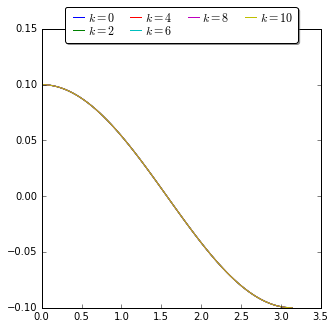

In [2]:
# --------------------/
# domain and boundaries

a = 0.0
b = 1.0 * math.pi
A = 0.1
B = A - 1.0

# --------------------/
# number of iterations

loops = 12

# --------------------/
# grid points, mesh
# and other definitions

m = 64
o = np.ones(m)
h = (b - a) / (1.0 + m)
t = np.linspace(a + h, b - h, m)
T = np.linspace(a, b, m + 2)
u = np.zeros(m)
U = np.zeros(m + 2)

# --------------------/
# symbolic maps
# --------------------/

# pseudo source
f = lambda x: 1.0 * np.cos(x) + B * np.cos(x)

# diagonal elements
d = lambda x: -2 + h**2 * np.cos(x)

# LHS 
g = lambda X, x: h**(-2) * ( X[0:-2] - 2*x[:] + X[2:] ) +  np.sin(x[:])

# --------------------/
# fit the interior and 
# boundary points

# initial guess
u = f(t)

# boundaries
U[0]  = A
U[-1] = -A

# tranpose
u = MX(u).T
U = MX(U).T

# --------------------/
# Jacobian matrix

J = h**(-2) * spdiags( [o, d(t), o], [-1, 0, 1], m, m).toarray()

# --------------------/
# plot outcomes

figure(figsize=(5,5))
labels = []

# --------------------/
# algorithm 

U[1:-1] = u
for i in range(0,loops):
    u = u - MX(J).I * g(U,u)
    U[1:-1] = u
    if i % 2 == 0:
        plt.plot(T, U)
        labels.append(r'$k = %i$' % i)
    
plt.legend(labels, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)


> NB property of [FVNTS](http://www.fvnts.ch/) 